In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analyzing raw data

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

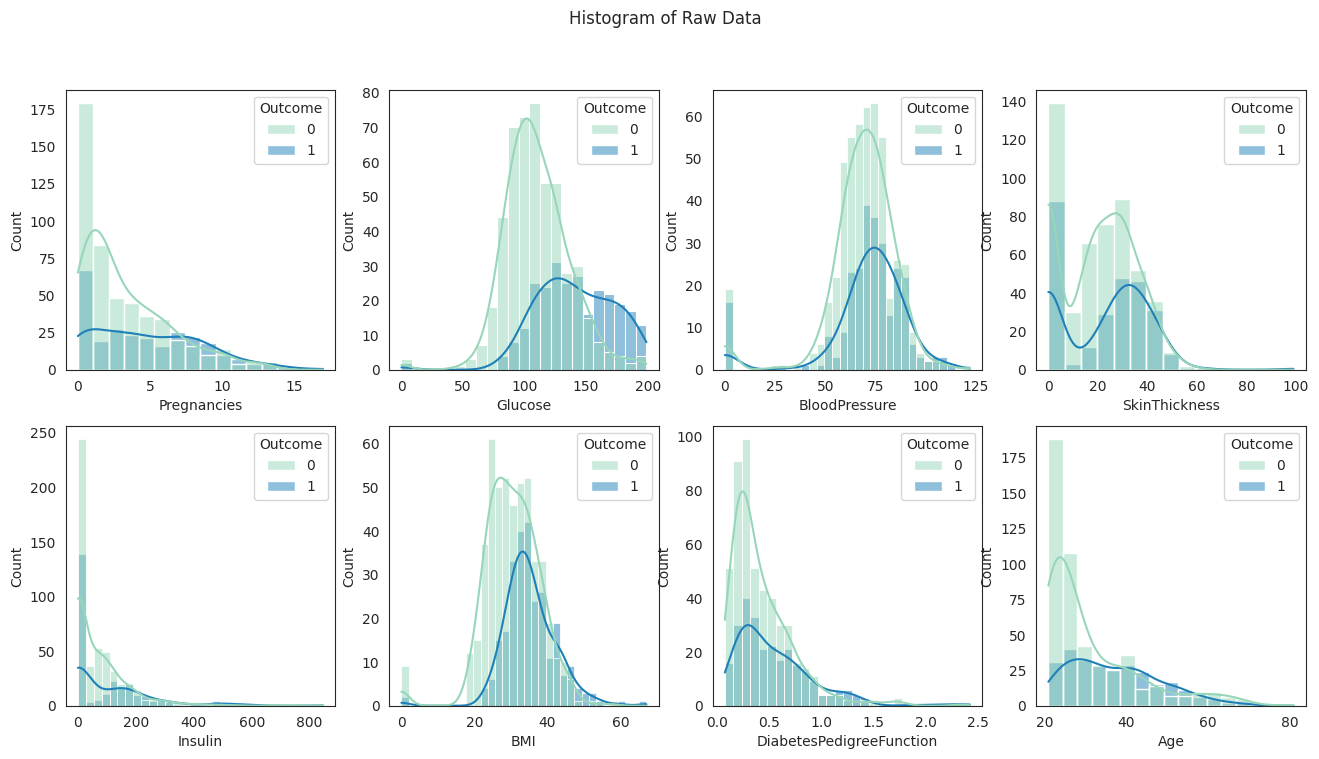

In [6]:
feature_names = [cname for cname in df.loc[:,:'Age'].columns]

plt.figure(figsize=(16,8))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.2)
i = 1
for name in feature_names:
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=name, hue="Outcome", kde=True, palette="YlGnBu")
    i+=1
plt.suptitle("Histogram of Raw Data")
plt.show()

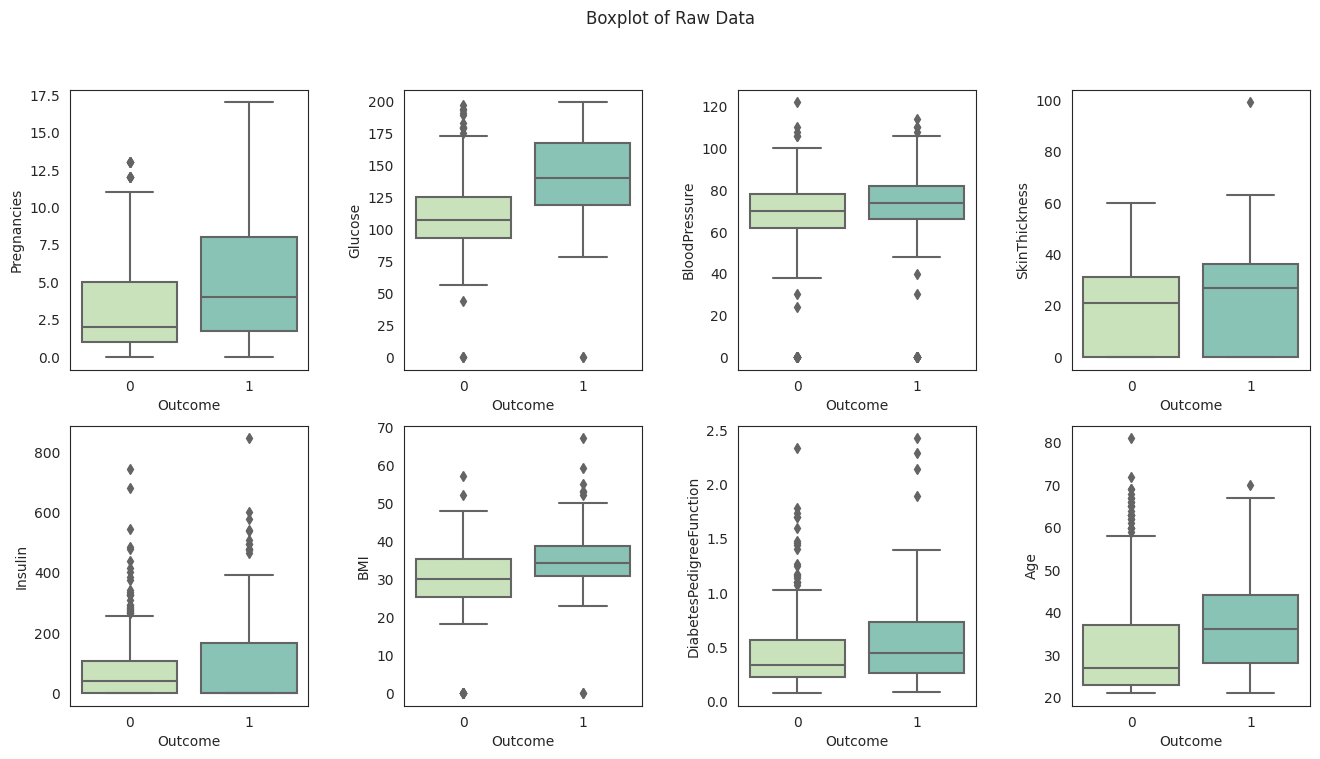

In [7]:
plt.figure(figsize=(16,8))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.2, wspace=0.4)
i = 1
for name in feature_names:
    plt.subplot(2, 4, i)
    sns.boxplot(y=name,
            x="Outcome", palette=["#c7e9b4", "#7fcdbb"],
            data=df)
    i+=1
plt.suptitle("Boxplot of Raw Data")
plt.show()

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='YlGnBu')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Pre-process data

In [10]:
num_cols_miss = [i for i in df.columns if (i != "Pregnancies" and i != "Outcome")]
df_pre_process = df.copy()

for i in num_cols_miss:
    df_pre_process[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

df_pre_process.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [11]:
df_pre_process.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df_pre_process = df_pre_process[~df_pre_process["Glucose"].isnull()] # Removing null data in Glucose
df_pre_process.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [53]:
q1 = np.percentile(df_pre_process[df_pre_process["Outcome"]==0]["Glucose"], 25)
q3 = np.percentile(df_pre_process[df_pre_process["Outcome"]==0]["Glucose"], 75)
iqr = q3 - q1

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = np.where((df_pre_process[df_pre_process["Outcome"]==0]["Glucose"] < lower_fence) | (df_pre_process[df_pre_process["Outcome"]==0]["Glucose"] > upper_fence))[0]

print(f"Lower Lim: {lower_fence}, Upper lim: {upper_fence}")
print(f"Outliers on non-diabetes data:", outliers)

Lower Lim: 45.0, Upper lim: 173.0
Outliers on non-diabetes data: [ 18  34 132 139 158 159 197 306 351 403 474]


In [54]:
# Outliers data on non-diabetes data
df_pre_process[(df_pre_process["Outcome"]==0) & ((df_pre_process["Glucose"] < lower_fence) | (df_pre_process["Glucose"] > upper_fence))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
40,3,180.0,64.0,25.0,70.0,34.0,0.271,26.0,0
62,5,44.0,62.0,NaN,NaN,25.0,0.587,36.0,0
212,7,179.0,95.0,31.0,NaN,34.2,0.164,60.0,0
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31.0,0
258,1,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0
260,3,191.0,68.0,15.0,130.0,30.9,0.299,34.0,0
327,10,179.0,70.0,NaN,NaN,35.1,0.200,37.0,0
489,8,194.0,80.0,NaN,NaN,26.1,0.551,67.0,0
549,4,189.0,110.0,31.0,NaN,28.5,0.680,37.0,0
622,6,183.0,94.0,NaN,NaN,40.8,1.461,45.0,0


In [55]:
outliers_index = df_pre_process[(df_pre_process["Outcome"]==0) & ((df_pre_process["Glucose"] < lower_fence) | (df_pre_process["Glucose"] > upper_fence))].index
outliers_index

Int64Index([40, 62, 212, 228, 258, 260, 327, 489, 549, 622, 728], dtype='int64')

In [64]:
df_pre_process = df_pre_process[~df_pre_process.index.isin(outliers_index)]
df_pre_process.shape

(752, 9)

In [65]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=8)
df_knn_imputation = pd.DataFrame(imputer.fit_transform(df_pre_process), columns=df_pre_process.columns) # fill with KNN
df_knn_imputation.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,176.25,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,61.50,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,215.75,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.00,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.00,43.1,2.288,33.0,1.0


In [101]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_knn_imputation), columns=df_knn_imputation.columns)
df_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.775,0.000,0.521739,0.410797,0.159341,0.666230,1.235294,1.0
1,-0.4,-0.800,-0.375,0.000000,-0.728514,-0.609890,-0.056283,0.117647,0.0
2,1.0,1.650,-0.500,0.000000,0.802979,-0.972527,0.784031,0.176471,1.0
3,-0.4,-0.700,-0.375,-0.521739,-0.405833,-0.445055,-0.537958,-0.470588,0.0
4,-0.6,0.500,-2.000,0.521739,0.328886,1.203297,5.014398,0.235294,1.0


In [102]:
df_new = df_scale.copy()

## Analyzing pre-processed data

In [103]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,7.520000e+02,752.000000,752.000000,752.000000
mean,0.167553,0.098371,0.020497,0.008008,0.163426,3.287935e-02,0.253624,0.247106,0.353723
std,0.676570,0.742334,0.755146,0.809886,0.924289,7.587345e-01,0.850031,0.689895,0.478443
min,-0.600000,-1.525000,-3.000000,-1.913043,-1.200124,-1.532967e+00,-0.770942,-0.470588,0.000000
25%,-0.400000,-0.450000,-0.500000,-0.521739,-0.452684,-5.109890e-01,-0.340314,-0.294118,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-3.911801e-16,0.000000,0.000000,0.000000
75%,0.600000,0.550000,0.500000,0.478261,0.547316,4.890110e-01,0.659686,0.705882,1.000000
max,2.800000,2.050000,3.125000,6.086957,7.060503,3.840659e+00,5.359948,3.058824,1.000000


In [104]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

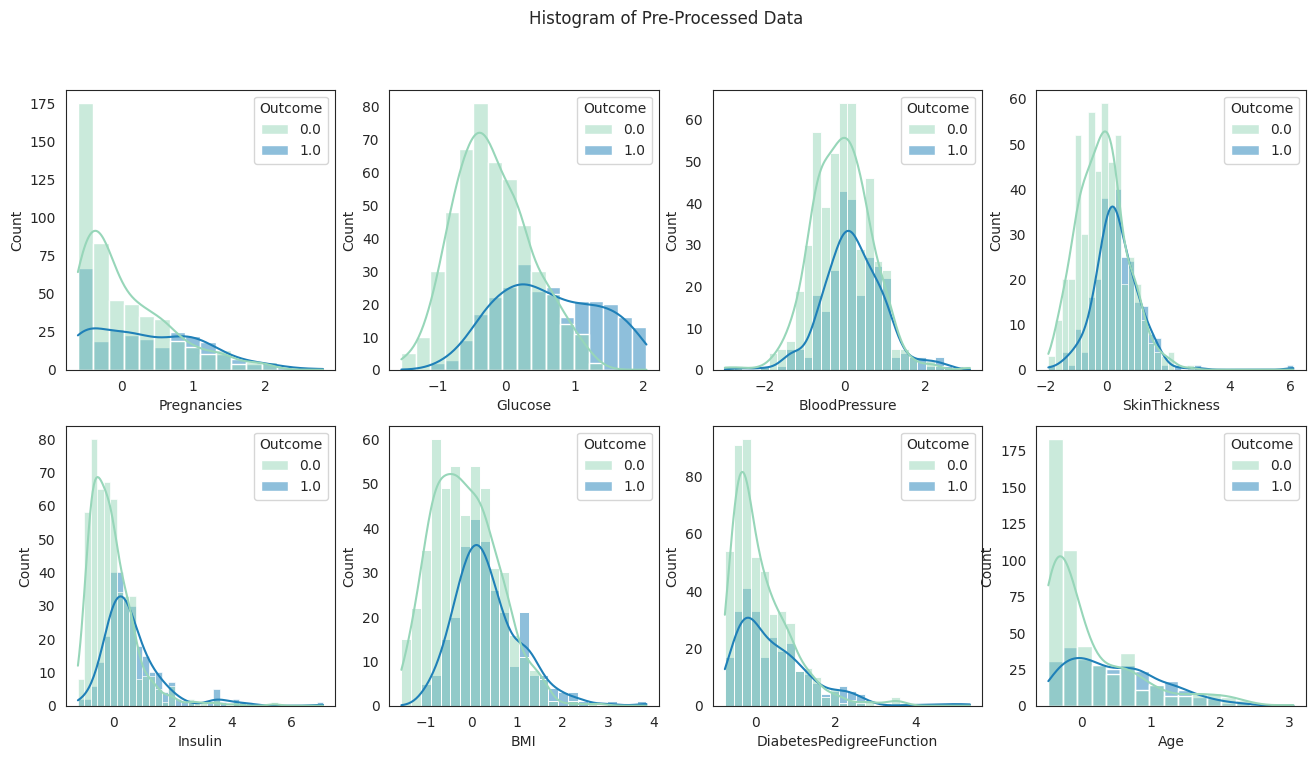

In [105]:
feature_names = [cname for cname in df_new.loc[:,:'Age'].columns]

plt.figure(figsize=(16,8))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.2)
i = 1
for name in feature_names:
    plt.subplot(2, 4, i)
    sns.histplot(data=df_new, x=name, hue="Outcome", kde=True, palette="YlGnBu")
    i+=1
plt.suptitle("Histogram of Pre-Processed Data")
plt.show()

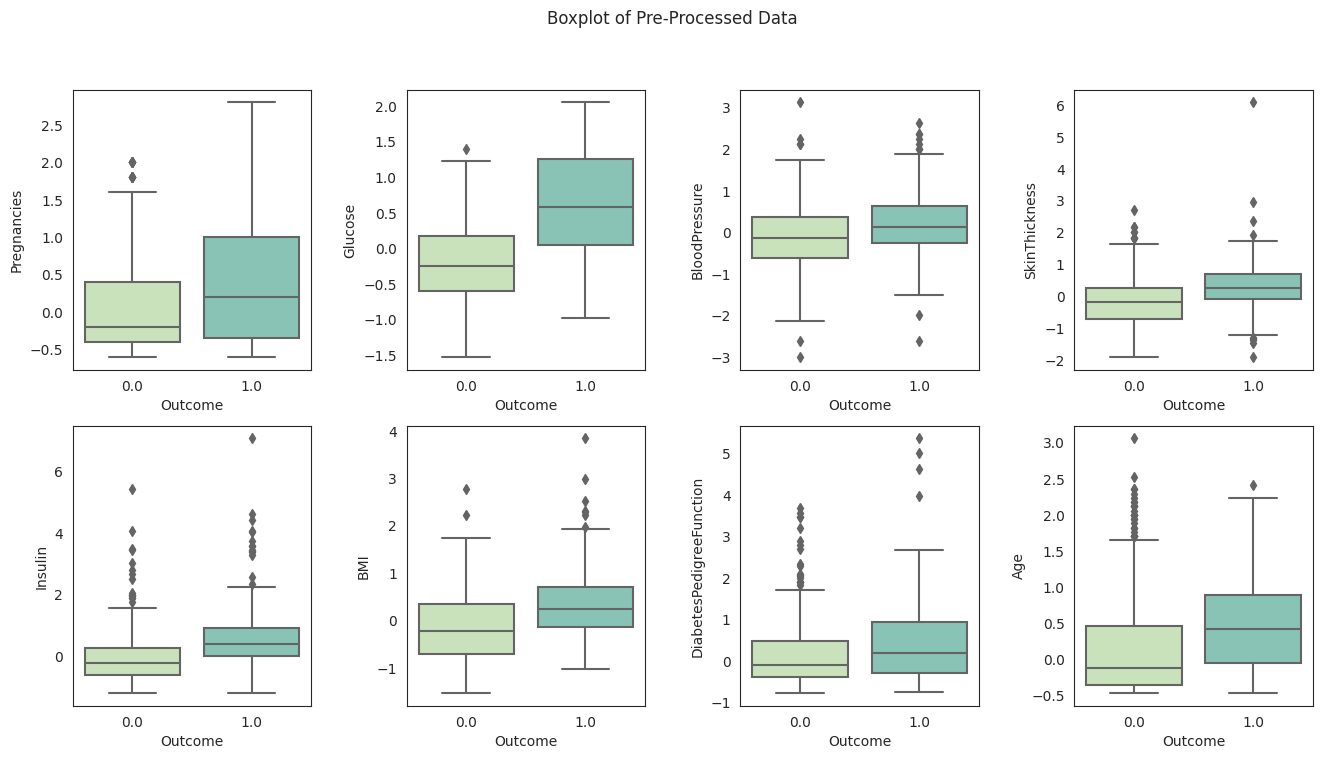

In [106]:
plt.figure(figsize=(16,8))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.2, wspace=0.4)
i = 1
for name in feature_names:
    plt.subplot(2, 4, i)
    sns.boxplot(y=name,
            x="Outcome", palette=["#c7e9b4", "#7fcdbb"],
            data=df_new)
    i+=1
plt.suptitle("Boxplot of Pre-Processed Data")
plt.show()

In [107]:
corr = df_new.corr()
corr.style.background_gradient(cmap='YlGnBu')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126836,0.212605,0.097008,0.049505,0.018711,-0.037734,0.540194,0.223904
Glucose,0.126836,1.000000,0.221797,0.259833,0.633799,0.245539,0.124160,0.267638,0.533157
BloodPressure,0.212605,0.221797,1.000000,0.232324,0.132949,0.296272,-0.002714,0.331167,0.177628
SkinThickness,0.097008,0.259833,0.232324,1.000000,0.248389,0.644847,0.107205,0.154580,0.278575
Insulin,0.049505,0.633799,0.132949,0.248389,1.000000,0.265438,0.095227,0.228809,0.351684
BMI,0.018711,0.245539,0.296272,0.644847,0.265438,1.000000,0.149553,0.025111,0.311440
DiabetesPedigreeFunction,-0.037734,0.124160,-0.002714,0.107205,0.095227,0.149553,1.000000,0.031011,0.185175
Age,0.540194,0.267638,0.331167,0.154580,0.228809,0.025111,0.031011,1.000000,0.243135
Outcome,0.223904,0.533157,0.177628,0.278575,0.351684,0.311440,0.185175,0.243135,1.000000


# Creating model

In [108]:
from sklearn.datasets import load_iris

X = df_new[df_new.columns[:-1]]
y = df_new[df_new.columns[-1]]

print(f"X: {X.shape}, y:{y.shape}")

X: (752, 8), y:(752,)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Train data: X {X_train.shape}, y {y_train.shape}")
print(f"Test data: X {X_test.shape}, y {y_test.shape}")

Train data: X (601, 8), y (601,)
Test data: X (151, 8), y (151,)


## SKLearn

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_train, y_train, cv=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)

print(f"Cross-validation accuracy: {round(np.mean(scores) * 100, 2)}%")
print(f"Geral accuracy: {round(acc * 100, 2)}%")

Cross-validation accuracy: 75.2%
Geral accuracy: 84.77%


## Tensorflow

In [111]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

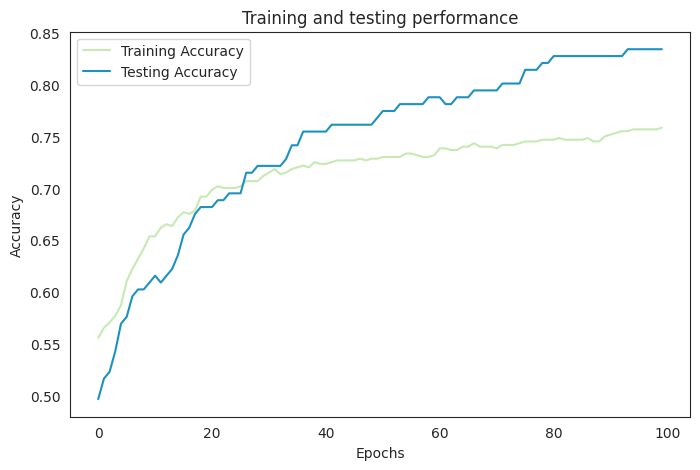

In [112]:
sns.set_style("white")
sns.set_palette("bright")

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color="#c7e9b4")
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color="#1d91c0")
plt.title("Training and testing performance")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


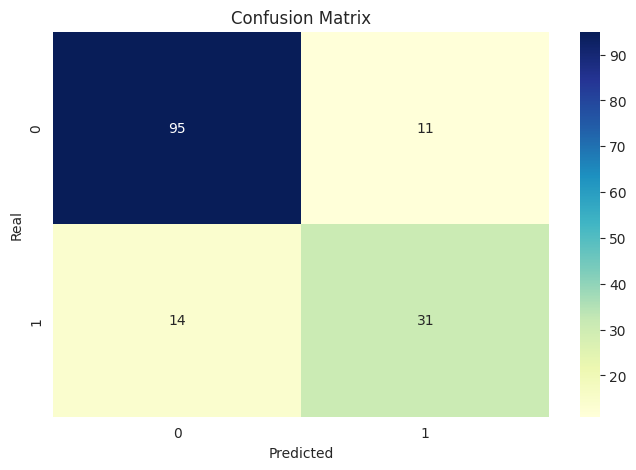

In [113]:
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
f = sns.heatmap(cm, cmap="YlGnBu", annot=True)
f.set_xticklabels(["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

5/5 [==============================] - 0s 5ms/step


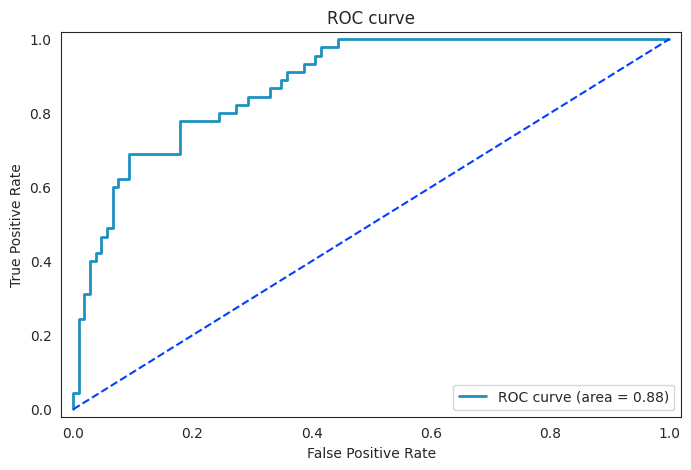

In [118]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = round(auc(fpr, tpr), 2)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='#1d91c0', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()